In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
data = pd.read_csv('clustering_data.csv')

C:\Users\soham\AppData\Local\Temp\ipykernel_15240\2067250216.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('clustering_data.csv')


In [178]:
data.head(10)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
5,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddannavaripalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2888,78.2777
6,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Velichelamala B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24888,78.2999
7,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Gurrambailu B.O,515571,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,13.9226755,78.2011756
8,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Marrimakulapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.56258,77.85715
9,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Modugulakunta B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.528,77.85426


In [179]:
ts_data = data[data['StateName']== 'TELANGANA']

In [180]:
ts_pindata = ts_data[['Pincode','Latitude','Longitude']]

In [181]:
predata = ts_pindata
predata = predata[predata['Latitude'].isna()==False]
predata = predata[predata['Longitude'].isna()==False]
predata = predata.drop_duplicates(subset=['Latitude', 'Longitude'])

In [182]:
print(predata.shape)

(3730, 3)


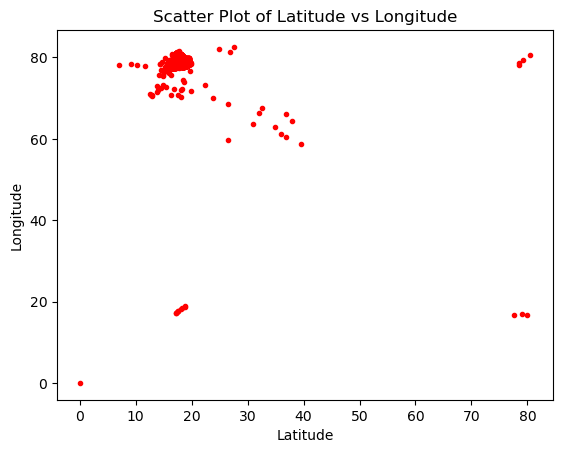

In [183]:
# Example data (replace with your actual data)
lat = np.array(predata['Latitude'], dtype=float)
lon = np.array(predata['Longitude'], dtype=float)

# Create the plot
fig, ax = plt.subplots()  # Create a figure and an axis

# Scatter plot
ax.scatter(lat, lon, color='red', marker='.')

# Set labels and title
ax.set_xlabel('Latitude')  # X-axis label
ax.set_ylabel('Longitude')  # Y-axis label
ax.set_title('Scatter Plot of Latitude vs Longitude')  # Title of the plot

# Show the plot
plt.show()

In [184]:
colors=['blue','red','green','orange','yellow','brown','black']

In [185]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters  # Number of clusters
        self.max_iter = max_iter  # Maximum number of iterations
        self.cluster_centers_ = None  # Centroids of the clusters
        self.cluster_labels_ = None  # Labels for each data point
        
    def fit(self, X):
        # Randomly initialize the centroids
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Assign each point to the nearest centroid
            self.cluster_labels_ = self._assign_to_nearest_centroid(X)
            
            # Calculate new centroids based on the current labels
            new_centroids = self._calculate_new_centroids(X)
            
            # Check for convergence (if centroids do not change)
            if np.allclose(self.cluster_centers_, new_centroids):
                break
            
            self.cluster_centers_ = new_centroids
    
    def _assign_to_nearest_centroid(self, X):
        # Compute distances from each point to each centroid
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        # Assign each point to the closest centroid
        return np.argmin(distances, axis=0)
    
    def _calculate_new_centroids(self, X):
        new_centroids = np.zeros_like(self.cluster_centers_)
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(X[self.cluster_labels_ == i], axis=0)
        return new_centroids
    
    def predict(self, X):
        # Compute distances from each point to each centroid
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        # Predict the nearest centroid for each point
        return np.argmin(distances, axis=0)


In [186]:
model = KMeans(5,600)

In [187]:
concat_data = np.array(predata[['Latitude','Longitude']],dtype=float)

In [188]:
model.fit(concat_data)

In [189]:
labels = model._assign_labels(concat_data)

AttributeError: 'KMeans' object has no attribute '_assign_labels'

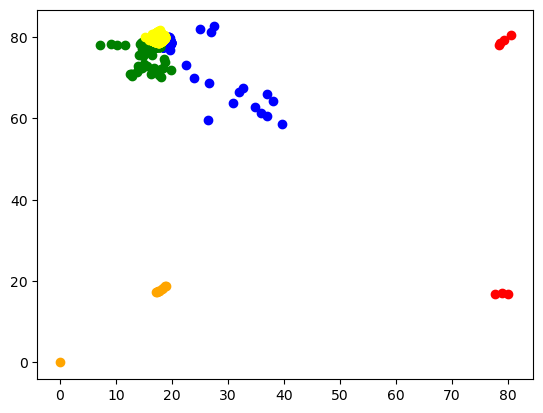

In [190]:
b = plt.subplot()

for i in range(0,7):
    b.scatter(lat[labels==i],lon[labels==i],color=colors[i])
    

plt.show()

In [77]:
lat.shape

(3730,)